In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

<h1>DATA Checks to perform</h1>
<ul>
<li>Check Missing Values</li>
<li>Check Duplicates</li>
<li>Check data type</li>
<li>Check the number of unique values of each column</li>
<li>Check statistics of data set</li>
<li>Check various categories present in the different categorical column</li>
</ul>

In [8]:
#check missing values
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [10]:
#Check duplicates
df.duplicated().sum()

0

In [12]:
#check NUll and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [14]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [16]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [24]:
print(f"Categories in 'gender' variable:   {df['gender'].unique()}")
print(f"Categories in 'race/ethnicity' variable:   {df['race/ethnicity'].unique()}")
print(f"Categories in 'parental level of education' variable:   {df['parental level of education'].unique()}")
print(f"Categories in 'lunch' variable:   {df['lunch'].unique()}")
print(f"Categories in 'test preparation course' variable:   {df['test preparation course'].unique()}")

Categories in 'gender' variable:   ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:   ['standard' 'free/reduced']
Categories in 'test preparation course' variable:   ['none' 'completed']


In [34]:
numerice_features = [feature for feature in df.columns if df[feature].dtype !='O'] 
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print(numerice_features)
print(categorical_features)

['math score', 'reading score', 'writing score']
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [40]:
df['total score']=df['math score']+df['reading score']+df['writing score']
df['average']=df['total score']/3

In [56]:
reading_full=df[df['reading score']==100]['math score'].count()
writing_full=df[df['writing score']==100]['math score'].count()
math_full=df[df['math score']==100]['math score'].count()

In [58]:
print(reading_full)
print(writing_full)
print(math_full)

17
14
7


In [60]:
reading_less_20=df[df['reading score']<=20]['math score'].count()
writing_less_20=df[df['writing score']<=20]['math score'].count()
math_less_20=df[df['math score']<=20]['math score'].count()
print(reading_less_20)
print(writing_less_20)
print(math_less_20)

1
3
4


<h3>Insights</h3>
~From the above we got students have performed the worst in Maths
~Best performance is in reading section

4. Exploring Data(Visualization)
   4.1 Visualizw average score distribution to make  some conclusion
   1. Historgram
   2. Kernel Distribution Function(KDE)

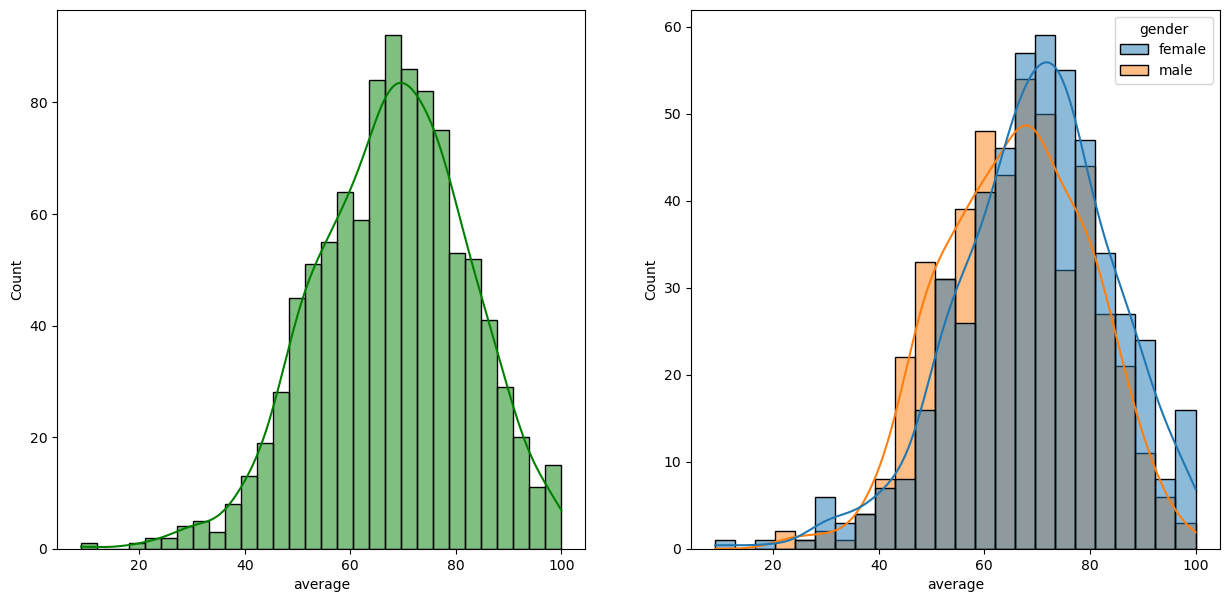

In [69]:
#Histogram
fig, axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

INSIGHTS
~Female students tend to perform wel then male studetns

In [80]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [76]:
!pip install catboost xgboost

   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB 487.6 kB/s eta 0:03:28
   ---------------------------------------- 0.2/101.1 MB 1.3 MB/s eta 0:01:17
   ---------------------------------------- 0.4/101.1 MB 2.3 MB/s eta 0:00:45
   ---------------------------------------- 0.5/101.1 MB 2.5 MB/s eta 0:00:42
   ---------------------------------------- 0.5/101.1 MB 2.5 MB/s eta 0:00:42
   ---------------------------------------- 0.9/101.1 MB 2.9 MB/s eta 0:00:35
   ---------------------------------------- 1.2/101.1 MB 3.3 MB/s eta 0:00:31
   ---------------------------------------- 1.2/101.1 MB 3.3 MB/s eta 0:00:31
    --------------------------------------- 1.4/101.1 MB 3.0 MB/s eta 0:00:34
    --------------------------------------- 1.8/101.1 MB 3.6 MB/s eta 0:00:28
    --------------------------------------- 1.9/101.1 MB 3.7 MB/s eta 0:00:2

In [86]:
X=df.drop(columns=['total score', 'math score', 'reading score', 'writing score','average'],axis=1)

In [88]:
y=df['total score']

In [90]:
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [92]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns 

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoding',oh_transformer, cat_features),
        ('StandardScaler',numeric_transformer, num_features),
    ]
)


In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 5), (200, 5))

In [104]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [116]:
X_train.shape, X_test.shape

((800, 17), (200, 17))

In [118]:
#Create an Evaluate function to give all metrics after model training
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2=r2_score(true, predicted)

    return mae,rmse,r2

In [130]:
models= {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(),
    "AdaBoost Regressor":AdaBoostRegressor(),
}

model_list = []
r2_list=[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performace for Training set')
    print('RMSE {:.4f}'.format(model_train_rmse))
    print('MAE {:.4f}'.format(model_train_mae))
    print('R2 {:.4f}'.format(model_train_r2))

    print('Model performace for Testing set')
    print('RMSE {:.4f}'.format(model_test_rmse))
    print('MAE {:.4f}'.format(model_test_mae))
    print('R2 {:.4f}'.format(model_test_r2))
    r2_list.append(model_test_r2)
     
    

Linear Regression
Model performace for Training set
RMSE 36.5870
MAE 29.8084
R2 0.2543
Model performace for Testing set
RMSE 40.2047
MAE 31.4705
R2 0.1622
Lasso
Model performace for Training set
RMSE 37.3079
MAE 30.1134
R2 0.2246
Model performace for Testing set
RMSE 41.1526
MAE 32.2553
R2 0.1222
Ridge
Model performace for Training set
RMSE 36.5871
MAE 29.8066
R2 0.2543
Model performace for Testing set
RMSE 40.2101
MAE 31.4788
R2 0.1619
K-Neighbors Regressor
Model performace for Training set
RMSE 35.1022
MAE 28.6293
R2 0.3136
Model performace for Testing set
RMSE 44.9622
MAE 35.9010
R2 -0.0478
Decision Tree
Model performace for Training set
RMSE 32.5942
MAE 25.8656
R2 0.4082
Model performace for Testing set
RMSE 45.6941
MAE 35.5642
R2 -0.0822
Random Forest Regressor
Model performace for Training set
RMSE 32.7962
MAE 26.3627
R2 0.4008
Model performace for Testing set
RMSE 44.6044
MAE 34.5848
R2 -0.0312
XGBRegressor
Model performace for Training set
RMSE 32.5944
MAE 25.8736
R2 0.4082
Mod